# Introduction
Benchmark the performance of the `tree edit distance` computation with the APTED package.

## Notebook configuration
Configure several notebook configuration settings.

In [3]:
# Disable some warnings

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

# Use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

## Libraries / Packages
Import several useful packages for the notebook and configure some extra options.

In [6]:
# Miscellaneous libraries
import time
import random
import numpy as np
import pandas as pd
import networkx as nx

from tqdm.notebook import tqdm
from collections import defaultdict, Counter

# Setup some options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100


# Visualization
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

###

import sys
sys.path.append('..')

from src.utils.convert import getAdjacencyList
from src.models.Trees.rooted_trees.apted import computeRootedTrees
from src.models.Trees.edit_distance.apted import computeEditDistance

# Benchmark
---

In [33]:
results = []

# Number of runs per parameter combination to avg results
num_runs = 100
# Fixed depth
depth = 3
# Parameters for the graph generation
n = [1_000]
p = np.arange(0.001, 0.01, 0.001)

###
for n_i in n:
    for p_j in p:
        G = nx.erdos_renyi_graph(n=n_i, p=p_j)
        G = getAdjacencyList(G)
        t_compute_trees = 0
        t_compute_distance = 0
        for _ in tqdm(range(num_runs)):
            # Compute the rooted trees of the dataset
            t0 = time.time()
            rooted_trees = computeRootedTrees(G, depth=depth)
            t1 = time.time()
            # Select random two trees in the dataset
            T1 = rooted_trees[random.randint(0, n_i - 1)]
            T2 = rooted_trees[random.randint(0, n_i - 1)]
            # Compute the distance between them
            distance = computeEditDistance(T1, T2)
            t2 = time.time()
            # Store timings
            t_compute_trees += t1 - t0
            t_compute_distance += t2 - t1
        # Append the results
        results_i = {
            'n': n_i,
            'p': p_j,
            'avg_degree': n_i * p_j,
            't_compute_trees': t_compute_trees / num_runs,
            't_compute_distance': t_compute_distance / num_runs,
        }
        print(results_i)
        results.append(results_i)


results = pd.DataFrame(results)
results

  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 't_compute_trees': 0.01930734157562256, 't_compute_distance': 0.0014400553703308105}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.002, 'avg_degree': 2.0, 't_compute_trees': 0.04323899507522583, 't_compute_distance': 0.015876760482788087}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.003, 'avg_degree': 3.0, 't_compute_trees': 0.086741623878479, 't_compute_distance': 0.12925693273544311}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.004, 'avg_degree': 4.0, 't_compute_trees': 0.13195582389831542, 't_compute_distance': 0.34274343729019163}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.005, 'avg_degree': 5.0, 't_compute_trees': 0.20074129343032837, 't_compute_distance': 1.2141845798492432}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.006, 'avg_degree': 6.0, 't_compute_trees': 0.292197539806366, 't_compute_distance': 3.8686818790435793}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.007, 'avg_degree': 7.0, 't_compute_trees': 0.3700044274330139, 't_compute_distance': 5.939655733108521}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.008, 'avg_degree': 8.0, 't_compute_trees': 0.5061180210113525, 't_compute_distance': 13.916362679004669}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.009000000000000001, 'avg_degree': 9.000000000000002, 't_compute_trees': 0.737015643119812, 't_compute_distance': 36.342988781929016}


,n,p,avg_degree,t_compute_trees,t_compute_distance
0,1000,0.001,1.0,0.019307,0.001440
1,1000,0.002,2.0,0.043239,0.015877
2,1000,0.003,3.0,0.086742,0.129257
3,1000,0.004,4.0,0.131956,0.342743
4,1000,0.005,5.0,0.200741,1.214185
5,1000,0.006,6.0,0.292198,3.868682
6,1000,0.007,7.0,0.370004,5.939656
7,1000,0.008,8.0,0.506118,13.916363
8,1000,0.009,9.0,0.737016,36.342989


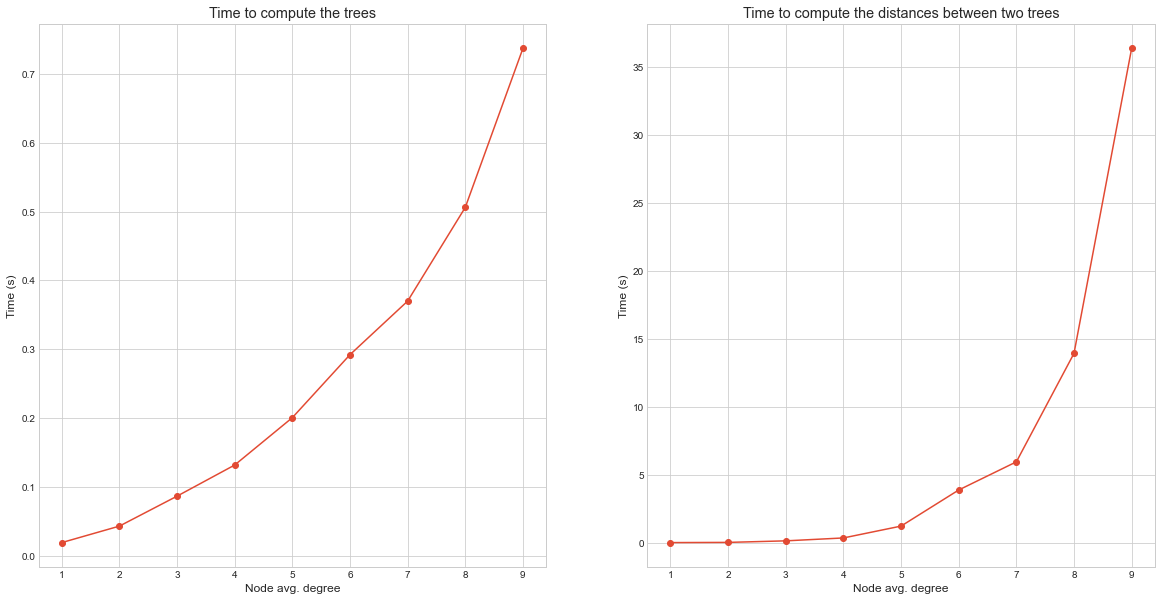

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)

ax1.plot(results['avg_degree'], results['t_compute_trees'], marker='o')
ax1.set_title('Time to compute the trees')
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Node avg. degree')

ax2.plot(results['avg_degree'], results['t_compute_distance'], marker='o')
ax2.set_title('Time to compute the distances between two trees')
ax2.set_ylabel('Time (s)')
ax2.set_xlabel('Node avg. degree')

plt.show()

In [11]:
import re

results = []

# Number of random tree distances to compute
n_samples = 300
# Fixed depth
depth = 3
# Parameters for the graph generation
n = [1_000]
p = np.arange(0.001, 0.01, 0.001)

###
for n_i in n:
    for p_j in p:
        G = nx.erdos_renyi_graph(n=n_i, p=p_j)
        G = getAdjacencyList(G)
        # Compute the rooted trees of the dataset
        rooted_trees = [re.sub(r"\d+", 'x', item) for item in computeRootedTrees(G, depth=depth)]
        time_distances = defaultdict(list)
        for _ in tqdm(range(n_samples)):
            t0 = time.time()
            # Select random two trees in the dataset
            T1 = rooted_trees[random.randint(0, n_i - 1)]
            T2 = rooted_trees[random.randint(0, n_i - 1)]
            # Compute the distance between them
            distance = computeEditDistance(T1, T2)
            t1 = time.time()
            # Store timings
            time_distances[distance].append(t1 - t0)
        # Append the results
        for k, v in time_distances.items():
            results.append({
                'n': n_i,
                'p': p_j,
                'avg_degree': n_i * p_j,
                'real_distance': k,
                't_compute_distance': np.mean(np.array(v)),
            })
        print(results)


results = pd.DataFrame(results)
results

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

  0%|          | 0/300 [00:00<?, ?it/s]

[{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 7, 't_compute_distance': 0.00133285919825236}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 6, 't_compute_distance': 0.0010631962826377467}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 5, 't_compute_distance': 0.0006531377633412679}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 9, 't_compute_distance': 0.0010705292224884033}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 0, 't_compute_distance': 0.0001624137797254197}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 8, 't_compute_distance': 0.0013587371162746263}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 31, 't_compute_distance': 0.0014347235361735027}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 20, 't_compute_distance': 0.00031048059463500977}, {'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 'real_distance': 15, 't_compute_distance': 0.001504341761271159}, {'n': 1000, 'p': 

,n,p,avg_degree,real_distance,t_compute_distance
0,1000,0.001,1.0,7,0.001333
1,1000,0.001,1.0,6,0.001063
2,1000,0.001,1.0,5,0.000653
3,1000,0.001,1.0,9,0.001071
4,1000,0.001,1.0,0,0.000162
...,...,...,...,...,...
1438,1000,0.009,9.0,1561,52.860418
1439,1000,0.009,9.0,692,18.919507
1440,1000,0.009,9.0,564,27.704254
1441,1000,0.009,9.0,173,19.236089


In [15]:
results_ = (results.sort_values(['avg_degree', 'real_distance'], ascending=(True, True))
                   .reset_index(drop=True)[['avg_degree', 'real_distance', 't_compute_distance']])
results_

,avg_degree,real_distance,t_compute_distance
0,1.0,0,0.000162
1,1.0,1,0.000761
2,1.0,2,0.000868
3,1.0,3,0.000387
4,1.0,4,0.001186
...,...,...,...
1438,9.0,1374,35.583399
1439,9.0,1494,31.316663
1440,9.0,1496,9.677457
1441,9.0,1561,52.860418


In [36]:
results_['avg_degree'] = results_['avg_degree'].astype(int)
results_

,avg_degree,real_distance,t_compute_distance
0,1,0,0.000162
1,1,1,0.000761
2,1,2,0.000868
3,1,3,0.000387
4,1,4,0.001186
...,...,...,...
1438,9,1374,35.583399
1439,9,1494,31.316663
1440,9,1496,9.677457
1441,9,1561,52.860418


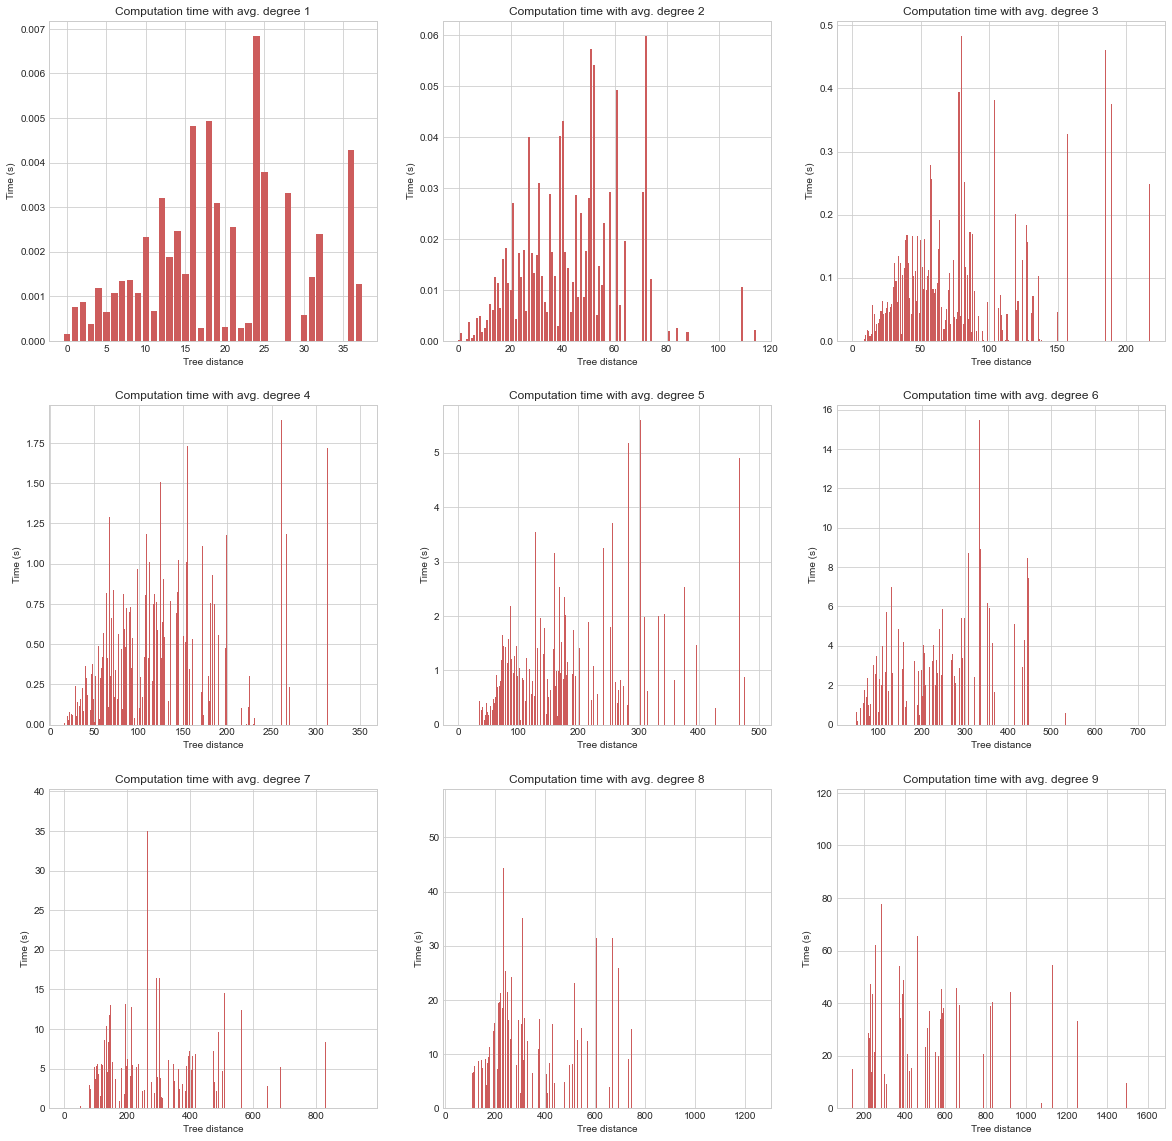

In [39]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20), sharey=False)

for i in range(9):
    df_ = results_[results_['avg_degree'] == i + 1]
    x = df_['real_distance'].to_numpy()
    y = df_['t_compute_distance'].to_numpy()
    ax[i // 3, i % 3].bar(x, y, color='indianred')
    ax[i // 3, i % 3].set_title(f'Computation time with avg. degree {i + 1}')
    ax[i // 3, i % 3].set_xlabel('Tree distance')
    ax[i // 3, i % 3].set_ylabel('Time (s)')

plt.show()

In [37]:
results_[results_['avg_degree'] == 9]

,avg_degree,real_distance,t_compute_distance
1196,9,137,7.388834
1197,9,141,15.002499
1198,9,153,13.967555
1199,9,154,3.075616
1200,9,155,15.366694
...,...,...,...
1438,9,1374,35.583399
1439,9,1494,31.316663
1440,9,1496,9.677457
1441,9,1561,52.860418


In [28]:
results_['avg_degree'].value_counts()

9.0    247
8.0    233
7.0    218
6.0    208
5.0    184
4.0    142
3.0    111
2.0     68
1.0     32
Name: avg_degree, dtype: int64

In [ ]:
###

In [47]:
!ls ../../../ana/data

cpu_metrics_CU   iperf-cliepc-ue  memo_metrics_CU  ping-epc-ue
cpu_metrics_DU   iperf-epc-cliue  memo_metrics_DU  ping-ue-epc
cpu_metrics_EPC  iperf-epc-srvue  memo_metrics_EPC
cpu_metrics_UE   iperf-srvepc-ue  memo_metrics_UE


In [111]:
import os
import pandas as pd



DATA_PATH = '../../../ana/data'
OUT_FILENAME = 'output.csv'


def processData(data_path, ID, start_date, end_date, out_filename):
    metrics = {'ID': ID, 'start_date': start_date, 'end_date': end_date}
    # For every file in the data
    for filename in os.listdir(data_path):
        if 'metrics' in filename:
            with open(f'{DATA_PATH}/{filename}', 'r') as f:
                lines = [x.strip().split() for x in f.readlines()[2:]]
                header = lines[0]
                header[0] = 'time'
                df = pd.DataFrame(lines[1:], columns=header)
            if 'cpu' in filename:
                avg_idle = 100 - df['%idle'].astype(float).mean()
                metrics.update({f'avg_cpu_{filename[-2:]}': avg_idle})
            else:
                avg_mem_used = df['%memused'].astype(float).mean()
                metrics.update({f'avg_mem_{filename[-2:]}': avg_mem_used})
        elif 'iperf' in filename:
            with open(f'{DATA_PATH}/{filename}', 'r') as f:
                lines = [x.strip().split(' Mbits/sec')[0].split()[-1] for x in f.readlines()[8:]]
                if lines[-1] == 'datagrams':
                    lines = lines[:-1]
                lines = np.array(lines).astype(float)
                avg_bandwidth = np.mean(lines)
                metrics.update({f'{filename}': avg_bandwidth})
        elif 'ping' in filename:
            with open(f'{DATA_PATH}/{filename}', 'r') as f:
                line = f.readlines()[-1]
                lattency = float(line.split('/')[-3])
            updown = 'up' if filename.endswith('epc') else 'down'
            metrics.update({f'lattency_{updown}': lattency})
                
    df = pd.DataFrame(metrics, columns=[
        'ID', 'start_date', 'end_date', 'avg_cpu_PC', 'avg_cpu_CU', 'avg_cpu_DU', 'avg_cpu_UE',
        'avg_mem_PC', 'avg_mem_CU', 'avg_mem_DU', 'avg_mem_UE', 'iperf-cliepc-ue', 'iperf-epc-srvue', 
        'iperf-srvepc-ue', 'iperf-epc-cliue', 'lattency_down', 'lattency_up'
    ], index=[0])
    df.to_csv(f'{data_path}/{out_filename}', mode='a', header=True if not os.path.exists(f'{data_path}/{out_filename}') else False, index=False)
    return df

        
processData(DATA_PATH, 'xd', 0, 1, OUT_FILENAME)

,ID,start_date,end_date,avg_cpu_PC,avg_cpu_CU,avg_cpu_DU,avg_cpu_UE,avg_mem_PC,avg_mem_CU,avg_mem_DU,avg_mem_UE,iperf-cliepc-ue,iperf-epc-srvue,iperf-srvepc-ue,iperf-epc-cliue,lattency_down,lattency_up
0,xd,0,1,7.610392,6.384444,33.904032,29.595303,90.303878,82.869808,92.832069,38.698429,9.006,9.008889,9.119,9.435,20.351,18.302


In [1]:
import itertools
from collections import Counter

ALPHABET = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

len([i for i in itertools.product(ALPHABET, repeat=3)])

1331

In [ ]:
for i in range(11):
    all_combinations = [i for i in itertools.product(ALPHABET, repeat=i)]
    print(len(all_combinations))

1
11
121
1331
14641
161051
1771561
19487171
214358881


In [5]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

list(powerset(ALPHABET))

[(),
 (0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 9),
 (8, 10),
 (9, 10),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),


In [8]:
def subset_sum(numbers, target, partial=[], partial_sum=0):
    if partial_sum == target:
        yield partial
    if partial_sum >= target:
        return
    for i, n in enumerate(numbers):
        remaining = numbers[i + 1:]
        yield from subset_sum(remaining, target, partial + [n], partial_sum + n)
        
        
list(subset_sum([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], target=10))

[[1, 2, 3, 4],
 [1, 2, 7],
 [1, 3, 6],
 [1, 4, 5],
 [1, 9],
 [2, 3, 5],
 [2, 8],
 [3, 7],
 [4, 6],
 [10]]

In [135]:
import itertools
import numpy as np


def pad(arr, n):
    '''
    Auxiliary function that pads an array up to a given length.
    
    Parameters:
        - arr: (array_like) Array to pad.
        - n: (int) Desired length of the padded array.
        
    Returns:
        - (np.array<int>) Padded array.
    '''
    padded = np.zeros(n)
    padded[:len(arr)] = arr
    return padded.astype(int)


def generatePermutations(arr):
    '''
    Auxiliary function that generates all unique permutations of a given array.
    
    Parameters:
        - arr: (array_like) Array to generate permutations from.
        
    Returns:
        - (list<np.array>) List with all the generated permutations.
    '''
    permutations = set(list(itertools.permutations(arr)))
    permutations = [np.array(permutation).astype(int) for permutation in permutations]
    return permutations


def findCombinations(arr, index, num, reducedNum):
    '''
    Function that generates all multisets that sum up to a given value.
    
    Parameters:
        - arr: (array_like) Array to store the combination
        - index: (int) Next location in array
        - num: (int) Given number
        - reducedNum: (int) Reduced number
        
    Returns:
        - None
    '''
    # Base condition
    if (reducedNum < 0):
        return
    # If combination is found, append it to results
    if (reducedNum == 0):
        all_combinations.append([arr[i] for i in range(index)])
        return
    # Find the previous number stored in arr[]
    prev = 1 if(index == 0) else arr[index - 1]
    # Note loop starts from previous number i.e. at array location index - 1
    for k in range(prev, num + 1):
        # Next element of array is k
        arr[index] = k
        # Call recursively with reduced number
        findCombinations(arr, index + 1, num, reducedNum - k)
        
MAX_DEGREE = 3
ALL_TREES = []

for degree in range(MAX_DEGREE + 1):
    all_combinations = []
    findCombinations([0] * (MAX_DEGREE + 1), 0, degree, degree)
    # Pad the found combinations
    all_combinations = [pad(x, n=MAX_DEGREE + 1) for x in all_combinations]
    # Generate all the unique permutations and flatten the output
    all_permutations = [generatePermutations(x) for x in all_combinations]
    all_permutations = [item for sublist in all_permutations for item in sublist]
    ALL_TREES.append(all_permutations)

# Flatten the list of all trees
ALL_TREES = [item for sublist in ALL_TREES for item in sublist]

len(ALL_TREES), ALL_TREES

(35,
 [array([0, 0, 0, 0]),
  array([0, 0, 1, 0]),
  array([1, 0, 0, 0]),
  array([0, 0, 0, 1]),
  array([0, 1, 0, 0]),
  array([1, 0, 1, 0]),
  array([1, 1, 0, 0]),
  array([1, 0, 0, 1]),
  array([0, 1, 1, 0]),
  array([0, 1, 0, 1]),
  array([0, 0, 1, 1]),
  array([0, 2, 0, 0]),
  array([0, 0, 0, 2]),
  array([2, 0, 0, 0]),
  array([0, 0, 2, 0]),
  array([1, 1, 0, 1]),
  array([0, 1, 1, 1]),
  array([1, 1, 1, 0]),
  array([1, 0, 1, 1]),
  array([0, 2, 0, 1]),
  array([0, 0, 2, 1]),
  array([0, 1, 2, 0]),
  array([0, 2, 1, 0]),
  array([2, 0, 0, 1]),
  array([1, 0, 2, 0]),
  array([1, 2, 0, 0]),
  array([2, 1, 0, 0]),
  array([2, 0, 1, 0]),
  array([0, 0, 1, 2]),
  array([1, 0, 0, 2]),
  array([0, 1, 0, 2]),
  array([0, 0, 0, 3]),
  array([0, 0, 3, 0]),
  array([0, 3, 0, 0]),
  array([3, 0, 0, 0])])

### Unordered sampling with replacement
---
$\binom{n + k - 1}{k} = \frac{(n + k - 1)!}{k!((n + k - 1) - k)!},$
where $n$ is the number of possible elements and $k$ is the number of samples to take.

In [133]:
def binomial(n, k):
    '''Auxiliary function for computing binomial numbers.'''
    if not 0 <= k <= n:
        return 0
    b = 1
    for t in range(min(k, n - k)):
        b *= n
        b //= t + 1
        n -= 1
    return b

f'{binomial(35 + 3 - 1, 3):,}'

'7,770'

In [134]:
###
# COMBINATIONS WITH REPLACEMENT!!! (not without)
for i in range(MAX_DEGREE + 1):
    combinations = list(itertools.combinations_with_replacement([x for x in range(len(ALL_TREES))], i))
    print(len(combinations))

1
35
630
7770


In [127]:
1 + 35 + 595 + 6545

7176